In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive

/content/drive


In [3]:
cd My Drive

/content/drive/My Drive


In [4]:
cd Predictive Classification of Software Code Quality Assessment

/content/drive/My Drive/Predictive Classification of Software Code Quality Assessment


In [5]:
cd Internal

/content/drive/My Drive/Predictive Classification of Software Code Quality Assessment/Internal


In [6]:
cd Final

/content/drive/My Drive/Predictive Classification of Software Code Quality Assessment/Internal/Final


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Load the dataset
df = pd.read_csv('train_data.csv')
df.head()

,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,...,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeLanguage,CodeSizeCategory,CodeType,CodeQuality,QualityScore,IsDeprecated,TeamSize
0,84485,8,2,1,1.0,18,66.61,0.18,5.63,NaN,...,0.384615,inf,49.0,JAVA,large,NaN,1,0.228319,1.0,4
1,77265,85293,4,4,1.0,3321,13848.57,0.06,15.44,10.91,...,0.826087,inf,64.0,Ruby,Medium,Library,8,0.792022,1.0,6
2,62215,14,2,1,2.0,35,151.27,0.14,7.31,19.75,...,0.590909,inf,70.0,ruby,Large,Desktop Application,3,0.725787,5.0,4
3,11168,19,3,1,3.0,38,NaN,0.13,7.5,21.51,...,0.652174,5.5,NaN,Python,Large,Desktop Application,30,3.532268,0.0,10
4,45035,8,3,1,1.0,24,98.10,0.11,9.9,8.40,...,0.846154,inf,216.0,Python,Small,NaN,16,0.732659,NaN,9


In [9]:
# display the no of rows and columns
df.shape

(74795, 37)

In [10]:
# display the basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74795 entries, 0 to 74794
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               74795 non-null  int64  
 1   McCabeLineCount                  74795 non-null  int64  
 2   McCabeCyclomaticComplexity       74795 non-null  int64  
 3   McCabeEssentialComplexity        74795 non-null  int64  
 4   McCabeDesignComplexity           58467 non-null  float64
 5   HalsteadTotalOperatorsOperands   74795 non-null  int64  
 6   HalsteadVolume                   61077 non-null  float64
 7   HalsteadProgramLength            74795 non-null  float64
 8   HalsteadDifficulty               67253 non-null  object 
 9   HalsteadIntelligence             69354 non-null  float64
 10  HalsteadEffort                   74795 non-null  float64
 11  HalsteadB                        74795 non-null  float64
 12  HalsteadTimeEstima

In [11]:
# display descriptive statistics for numerical column
df.describe()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadIntelligence,HalsteadEffort,...,BranchCount,CodeDensity,CommentDensity,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeQuality,QualityScore,IsDeprecated,TeamSize
count,74795.000000,7.479500e+04,74795.000000,74795.000000,58467.000000,7.479500e+04,6.107700e+04,74795.000000,69354.000000,7.479500e+04,...,74795.000000,6.908300e+04,5.095000e+04,69018.000000,69049.0,61034.000000,74795.000000,74795.000000,68278.000000,74795.000000
mean,50887.683722,1.286923e+04,18.488896,26.314727,24.870029,1.198933e+03,5.356628e+03,1.226494,230.736342,1.433703e+05,...,31.712989,inf,inf,1.838801,inf,187.599977,13.588047,1.174133,1.257975,16.425964
std,29418.873220,1.328567e+05,101.184282,412.069219,298.709440,2.773632e+04,7.798137e+04,15.457737,1718.309305,2.826427e+06,...,240.095289,NaN,NaN,6.140746,NaN,807.061004,40.301051,3.694688,6.944162,97.700148
min,0.000000,1.000000e+00,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,0.000000e+00,0.000000e+00,0.000000,0.0,6.000000,1.000000,0.000040,0.000000,1.000000
25%,25306.500000,1.300000e+01,2.000000,1.000000,2.000000,2.600000e+01,1.042500e+02,0.050000,16.420000,6.837100e+02,...,3.000000,4.111111e+00,0.000000e+00,0.611111,34.0,40.000000,4.000000,0.296830,0.000000,4.000000
50%,50929.000000,2.400000e+01,3.000000,1.000000,2.000000,5.700000e+01,2.668900e+02,0.100000,25.770000,3.045880e+03,...,7.000000,7.000000e+00,0.000000e+00,0.714286,NaN,75.000000,7.000000,0.589867,1.000000,7.000000
75%,76419.000000,4.800000e+01,7.000000,5.000000,5.000000,1.380000e+02,7.386200e+02,0.180000,43.790000,1.437252e+04,...,19.000000,2.350000e+01,4.615385e-01,0.865385,NaN,109.000000,9.000000,0.886945,1.000000,9.000000
max,101761.000000,2.258296e+07,10143.000000,59976.000000,29808.000000,6.056532e+06,7.422030e+06,1356.750000,186857.280000,3.821413e+08,...,30618.000000,inf,inf,301.500000,inf,56320.000000,2520.000000,204.910967,1200.000000,21168.000000


In [12]:
# summary for object column
df.describe(include='object')

,HalsteadDifficulty,HalsteadLineCountBlank,UniqueOperators,OperatorToOperandRatio,ComplexityEfficiency,CodeLanguage,CodeSizeCategory,CodeType
count,67253,60656,64097,57359,71150,74795,60163,65013
unique,4101,155,99,7683,11826,14,10,10
top,0,0,0,1.5,inf,C++,Large,Web Application
freq,5110,11473,4804,1680,4740,12823,17880,19516


In [13]:
# dropping duplicates
df = df.drop_duplicates(keep='last')
df

,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,...,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeLanguage,CodeSizeCategory,CodeType,CodeQuality,QualityScore,IsDeprecated,TeamSize
0,84485,8,2,1,1.0,18,66.61,0.18,5.63,NaN,...,0.384615,inf,49.0,JAVA,large,NaN,1,0.228319,1.0,4
1,77265,85293,4,4,1.0,3321,13848.57,0.06,15.44,10.91,...,0.826087,inf,64.0,Ruby,Medium,Library,8,0.792022,1.0,6
2,62215,14,2,1,2.0,35,151.27,0.14,7.31,19.75,...,0.590909,inf,70.0,ruby,Large,Desktop Application,3,0.725787,5.0,4
3,11168,19,3,1,3.0,38,NaN,0.13,7.5,21.51,...,0.652174,5.500,NaN,Python,Large,Desktop Application,30,3.532268,0.0,10
4,45035,8,3,1,1.0,24,98.10,0.11,9.9,8.40,...,0.846154,inf,216.0,Python,Small,NaN,16,0.732659,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74790,54886,61,8,5,6.0,157,20162.75,1.25,18.38,44.35,...,0.784091,5.125,NaN,JavaScript,Small,Library,4,0.822789,0.0,7
74791,76820,16,4,3,1.0,25,NaN,0.13,9.17,13.11,...,0.666667,inf,102.0,Java,Small,Library,8,0.001313,1.0,4
74792,65170,14,98,49,1.0,24,89.86,0.15,6.75,14.01,...,0.600000,0.800,33.0,JavaScript,SMALL,Web Application,6,5.824505,0.0,7
74793,860,17,2,36,72.0,36,165.06,0.17,5.85,28.52,...,5.727273,inf,79.0,C++,NaN,Library,3,0.031606,0.0,10


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72263 entries, 0 to 74794
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               72263 non-null  int64  
 1   McCabeLineCount                  72263 non-null  int64  
 2   McCabeCyclomaticComplexity       72263 non-null  int64  
 3   McCabeEssentialComplexity        72263 non-null  int64  
 4   McCabeDesignComplexity           56481 non-null  float64
 5   HalsteadTotalOperatorsOperands   72263 non-null  int64  
 6   HalsteadVolume                   58997 non-null  float64
 7   HalsteadProgramLength            72263 non-null  float64
 8   HalsteadDifficulty               64988 non-null  object 
 9   HalsteadIntelligence             67005 non-null  float64
 10  HalsteadEffort                   72263 non-null  float64
 11  HalsteadB                        72263 non-null  float64
 12  HalsteadTimeEstimator  

In [15]:
# creating numerical columns
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
numerical_columns

Index(['id', 'McCabeLineCount', 'McCabeCyclomaticComplexity',
       'McCabeEssentialComplexity', 'McCabeDesignComplexity',
       'HalsteadTotalOperatorsOperands', 'HalsteadVolume',
       'HalsteadProgramLength', 'HalsteadIntelligence', 'HalsteadEffort',
       'HalsteadB', 'HalsteadTimeEstimator', 'HalsteadLineCountCode',
       'HalsteadLineCountComment', 'HalsteadLineCountCodeAndComment',
       'UniqueOperands', 'TotalOperators', 'TotalOperands', 'BranchCount',
       'CodeDensity', 'CommentDensity', 'OperandsPerOperator',
       'CodeAndCommentRatio', 'CodeAge', 'CodeQuality', 'QualityScore',
       'IsDeprecated', 'TeamSize'],
      dtype='object')

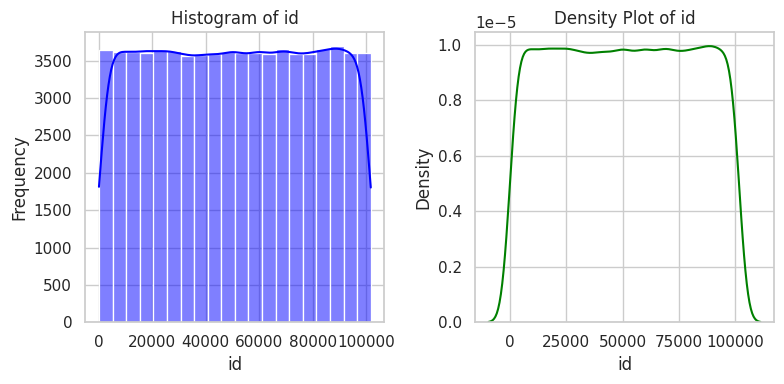

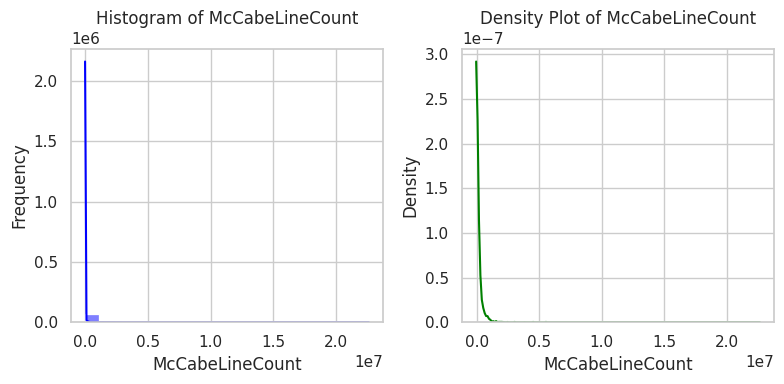

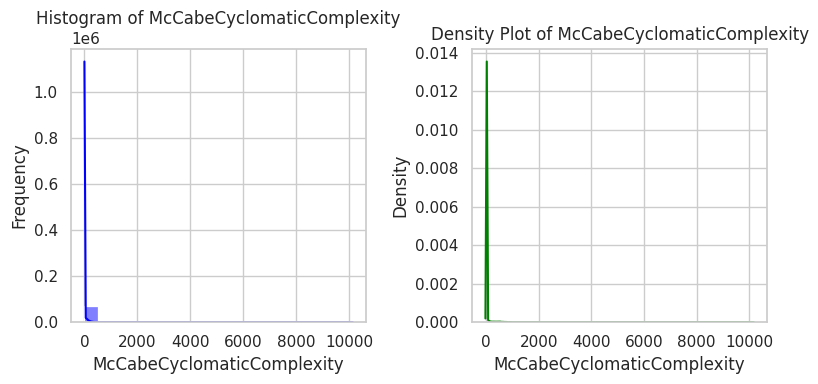

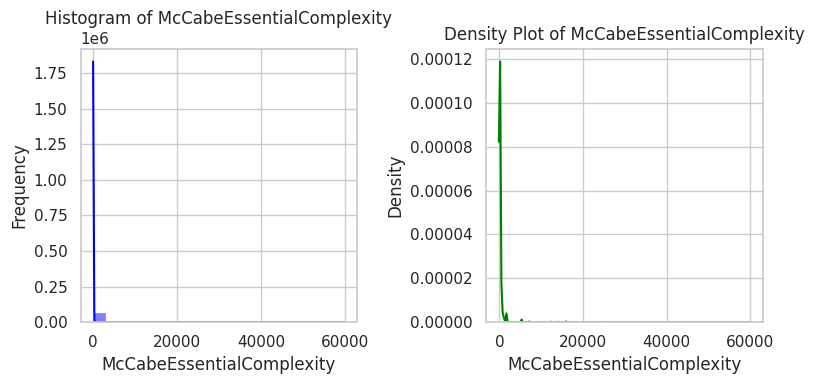

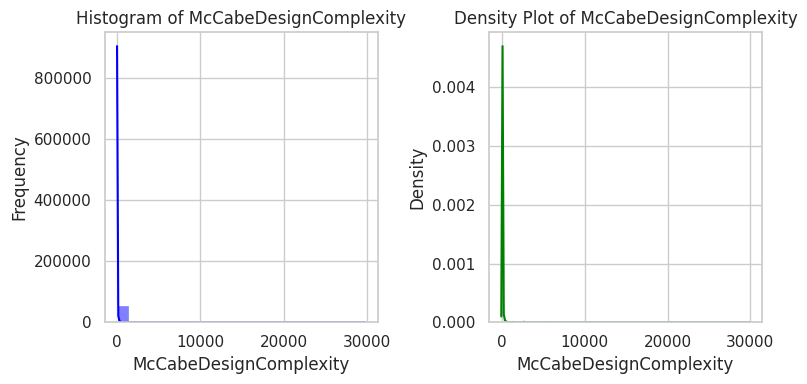

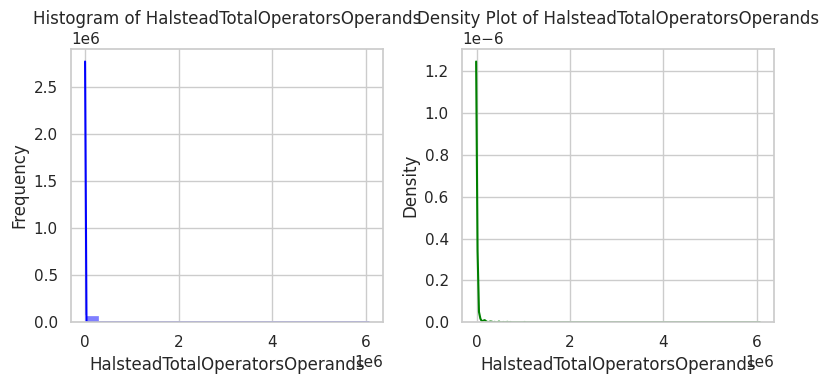

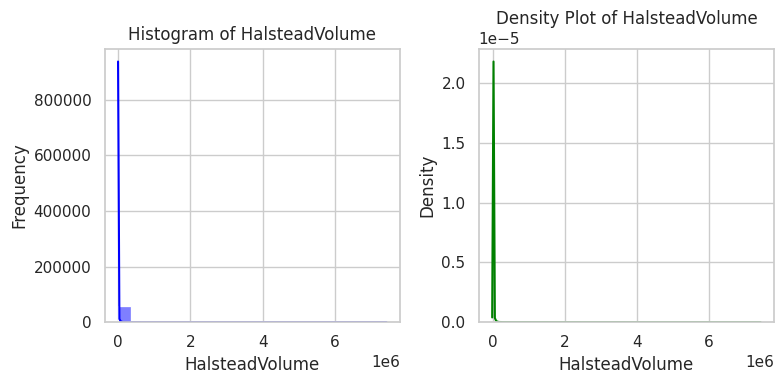

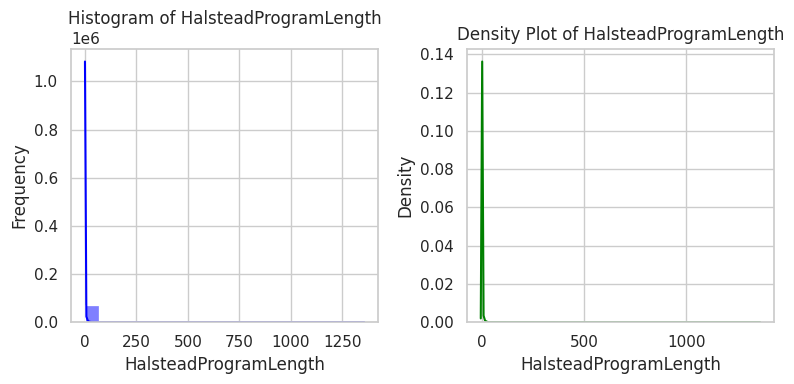

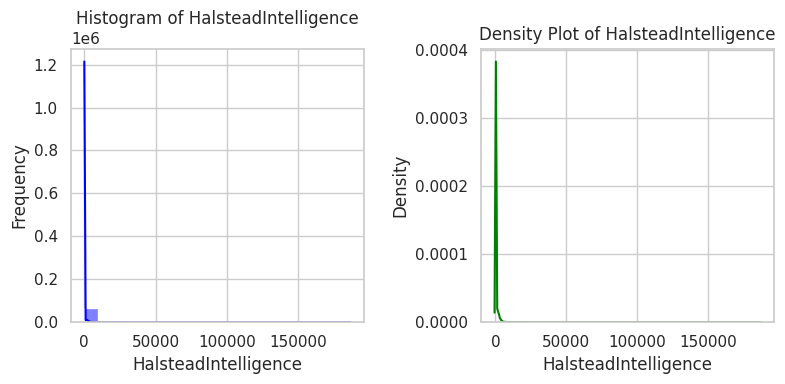

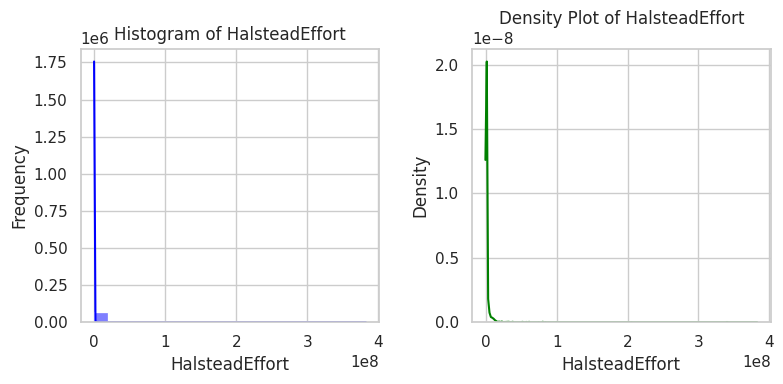

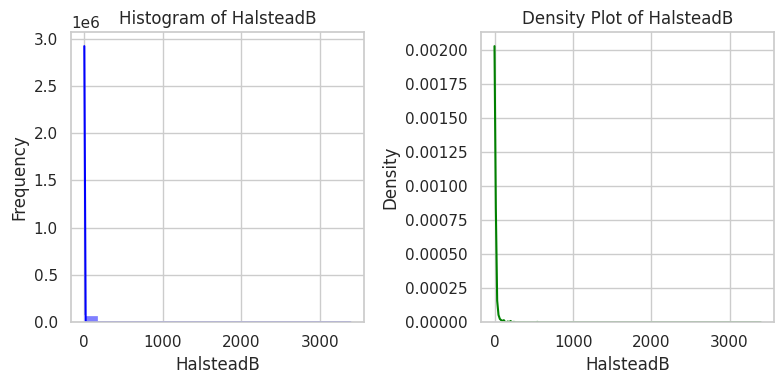

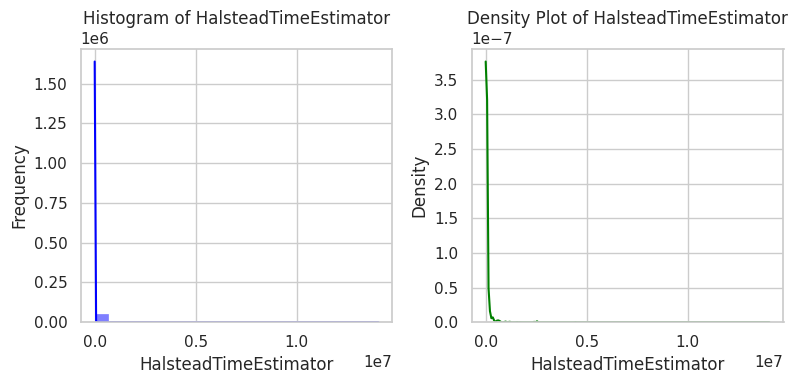

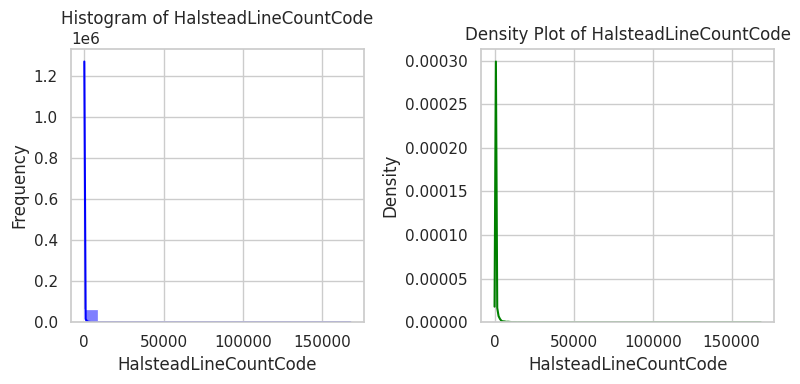

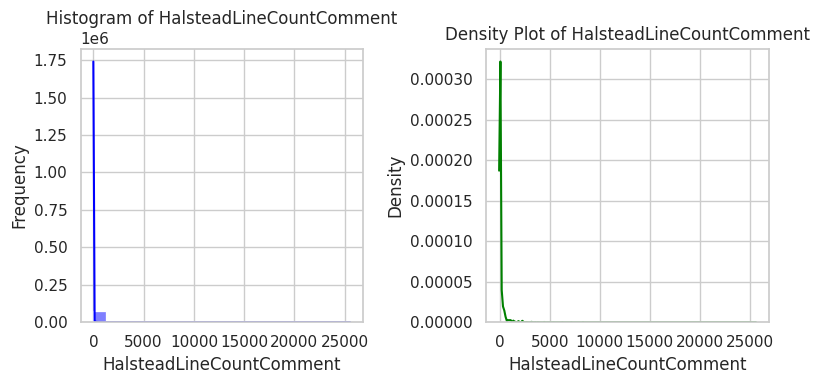

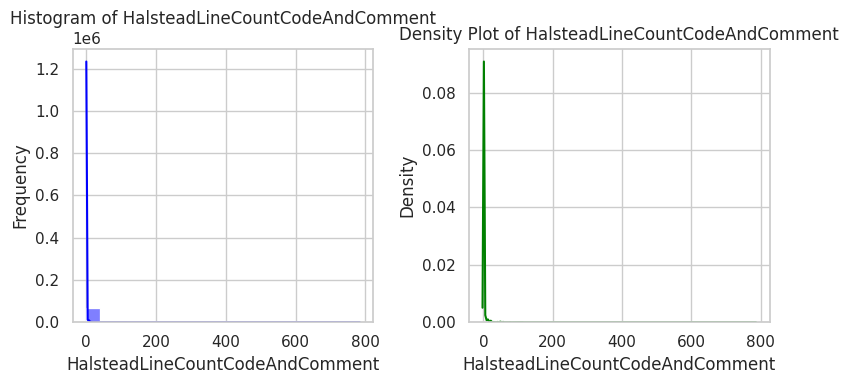

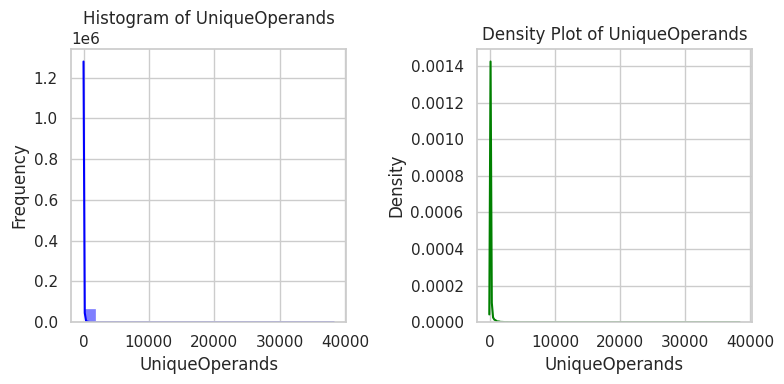

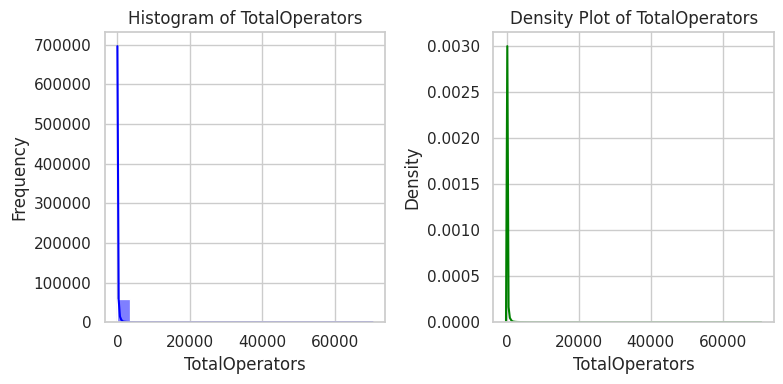

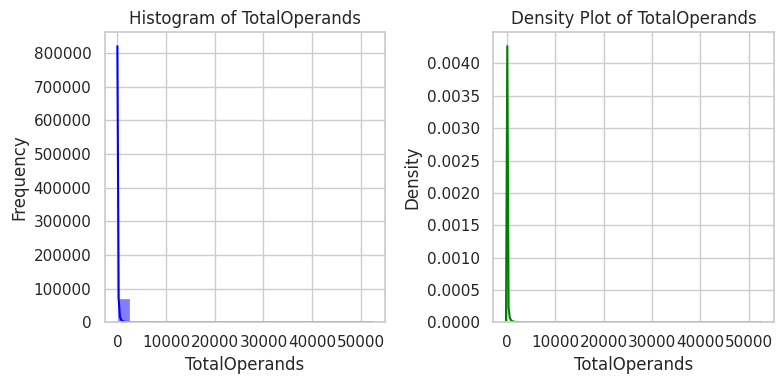

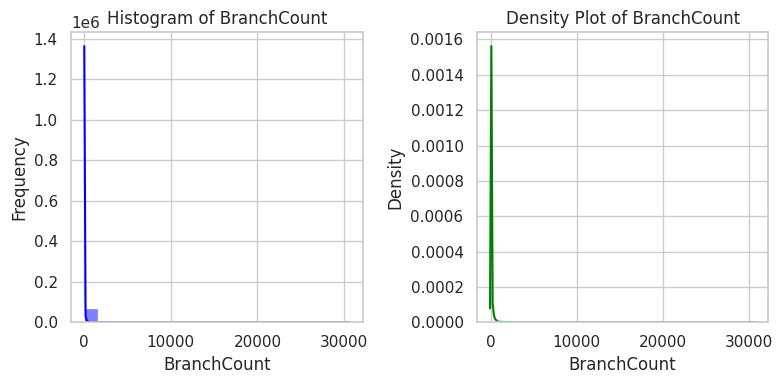

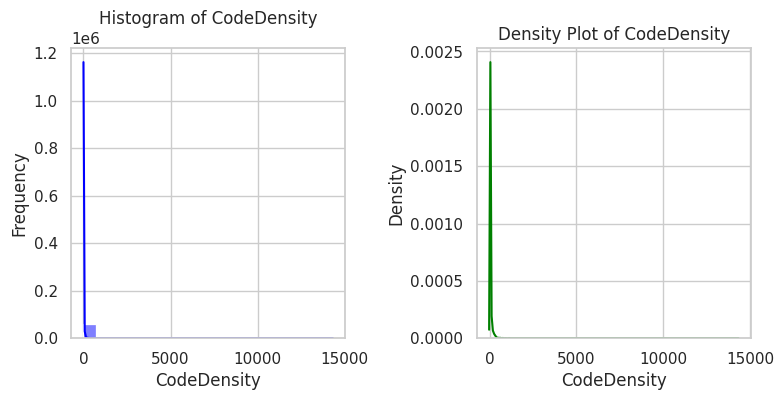

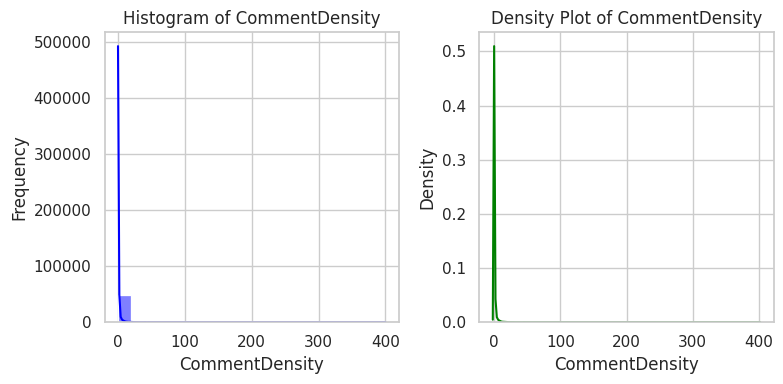

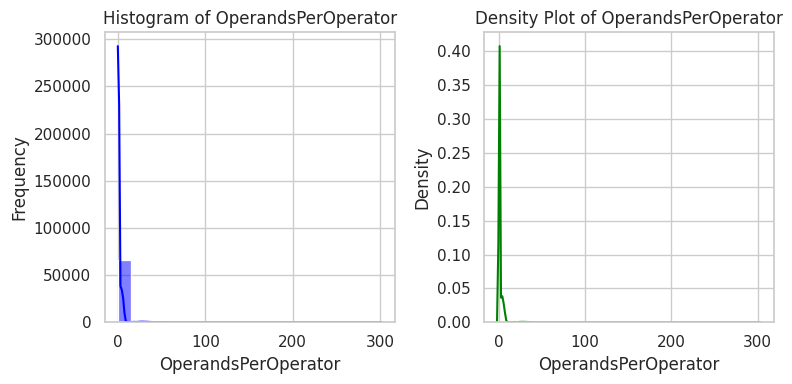

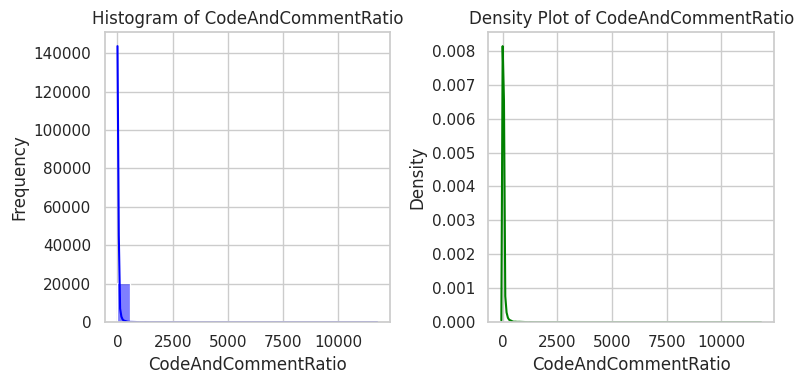

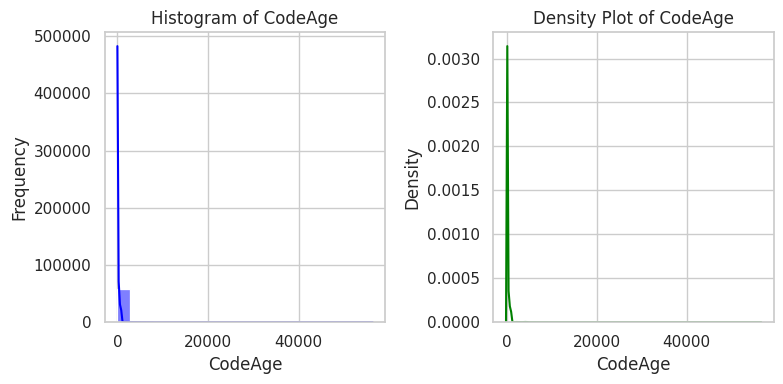

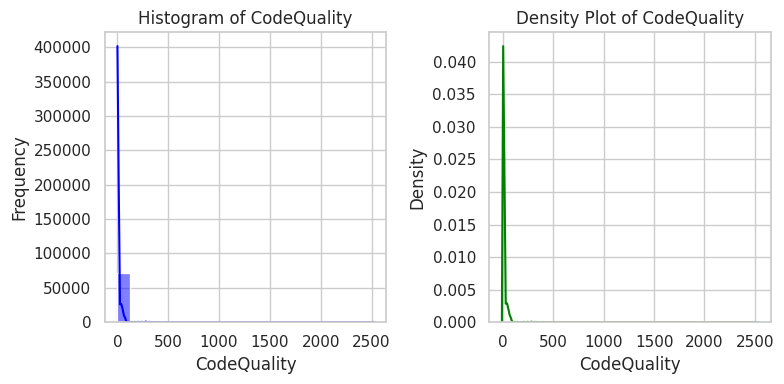

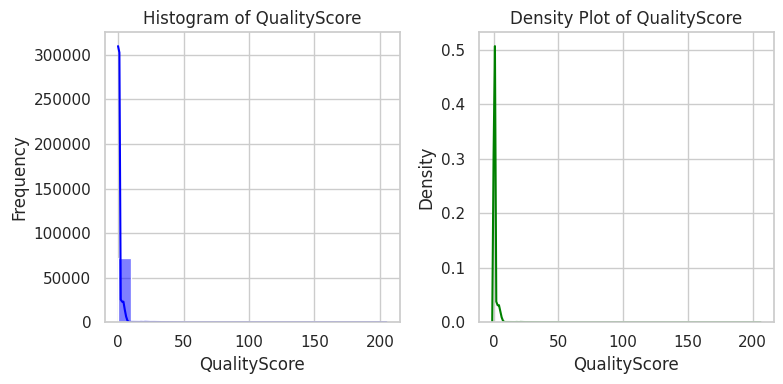

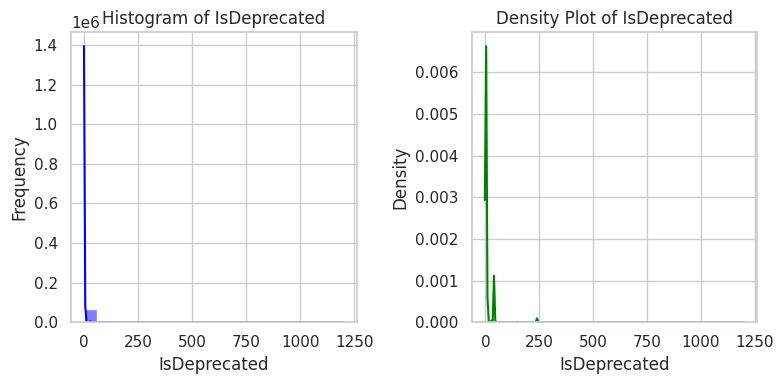

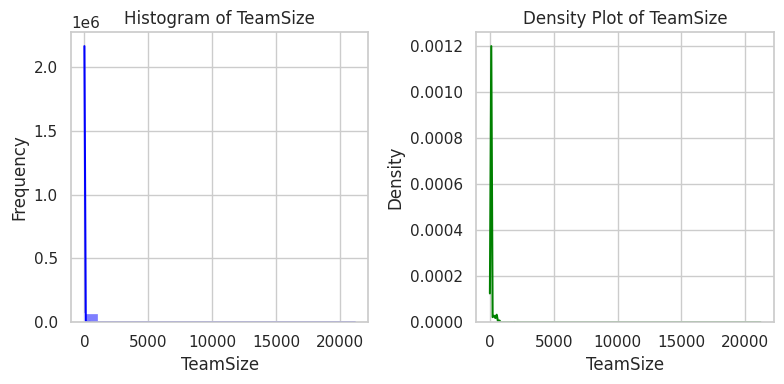

In [16]:
# checking the distribution of numerical column
sns.set(style="whitegrid")


for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.kdeplot(df[col], color='green')
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

In [17]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()
missing_values


,0
id,0
McCabeLineCount,0
McCabeCyclomaticComplexity,0
McCabeEssentialComplexity,0
McCabeDesignComplexity,15782
HalsteadTotalOperatorsOperands,0
HalsteadVolume,13266
HalsteadProgramLength,0
HalsteadDifficulty,7275
HalsteadIntelligence,5258


In [18]:
# Calculate the percentage of missing values
percentage_missing = (missing_values / len(df)) * 100
percentage_missing


,0
id,0.000000
McCabeLineCount,0.000000
McCabeCyclomaticComplexity,0.000000
McCabeEssentialComplexity,0.000000
McCabeDesignComplexity,21.839669
HalsteadTotalOperatorsOperands,0.000000
HalsteadVolume,18.357943
HalsteadProgramLength,0.000000
HalsteadDifficulty,10.067393
HalsteadIntelligence,7.276199


In [19]:
# finding the correlation among missing value
missing_corr = df.isnull().corr()
missing_corr

,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,...,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeLanguage,CodeSizeCategory,CodeType,CodeQuality,QualityScore,IsDeprecated,TeamSize
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
McCabeLineCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
McCabeCyclomaticComplexity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
McCabeEssentialComplexity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
McCabeDesignComplexity,NaN,NaN,NaN,NaN,1.000000,NaN,0.001363,NaN,0.000575,-0.000171,...,-0.002151,-0.002745,0.004474,NaN,0.000264,-0.008259,NaN,NaN,-0.004933,NaN
HalsteadTotalOperatorsOperands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HalsteadVolume,NaN,NaN,NaN,NaN,0.001363,NaN,1.000000,NaN,0.001955,-0.008293,...,-0.004546,-0.003706,0.002653,NaN,0.000335,-0.000144,NaN,NaN,-0.003560,NaN
HalsteadProgramLength,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HalsteadDifficulty,NaN,NaN,NaN,NaN,0.000575,NaN,0.001955,NaN,1.000000,-0.001477,...,0.004535,0.004013,-0.000921,NaN,-0.000155,-0.002806,NaN,NaN,-0.002045,NaN
HalsteadIntelligence,NaN,NaN,NaN,NaN,-0.000171,NaN,-0.008293,NaN,-0.001477,1.000000,...,0.000434,0.000658,0.005144,NaN,-0.004221,0.000787,NaN,NaN,-0.004837,NaN


In [20]:
#Creating categorical column
categorical_columns = df.select_dtypes(exclude=['float64','int64','bool']).columns

In [21]:
categorical_columns

Index(['HalsteadDifficulty', 'HalsteadLineCountBlank', 'UniqueOperators',
       'OperatorToOperandRatio', 'ComplexityEfficiency', 'CodeLanguage',
       'CodeSizeCategory', 'CodeType'],
      dtype='object')

In [22]:
# List of object columns to fill missing values by mode
object_columns_to_fill = ['HalsteadDifficulty', 'HalsteadLineCountBlank', 'UniqueOperators',
                           'OperatorToOperandRatio', 'ComplexityEfficiency', 'CodeSizeCategory', 'CodeType']

df[object_columns_to_fill] = df[object_columns_to_fill].apply(lambda x: x.fillna(x.mode()[0]))

In [23]:
# List of numerical columns to fill missing values
numerical_columns_to_fill = ['McCabeDesignComplexity', 'HalsteadVolume', 'HalsteadIntelligence',
                              'HalsteadTimeEstimator', 'HalsteadLineCountCode',
                              'HalsteadLineCountCodeAndComment', 'TotalOperators', 'CodeDensity',
                              'OperandsPerOperator', 'CodeAndCommentRatio', 'CodeAge', 'IsDeprecated','CommentDensity']

# Fill missing values in specified numerical columns with their mean
df[numerical_columns_to_fill] = df[numerical_columns_to_fill].fillna(df[numerical_columns_to_fill].mean())

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72263 entries, 0 to 74794
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               72263 non-null  int64  
 1   McCabeLineCount                  72263 non-null  int64  
 2   McCabeCyclomaticComplexity       72263 non-null  int64  
 3   McCabeEssentialComplexity        72263 non-null  int64  
 4   McCabeDesignComplexity           72263 non-null  float64
 5   HalsteadTotalOperatorsOperands   72263 non-null  int64  
 6   HalsteadVolume                   72263 non-null  float64
 7   HalsteadProgramLength            72263 non-null  float64
 8   HalsteadDifficulty               72263 non-null  object 
 9   HalsteadIntelligence             72263 non-null  float64
 10  HalsteadEffort                   72263 non-null  float64
 11  HalsteadB                        72263 non-null  float64
 12  HalsteadTimeEstimator  

In [25]:
#find the number of unique values in each column
df.nunique()

,0
id,72263
McCabeLineCount,577
McCabeCyclomaticComplexity,159
McCabeEssentialComplexity,152
McCabeDesignComplexity,133
HalsteadTotalOperatorsOperands,1665
HalsteadVolume,6905
HalsteadProgramLength,172
HalsteadDifficulty,4101
HalsteadIntelligence,9801


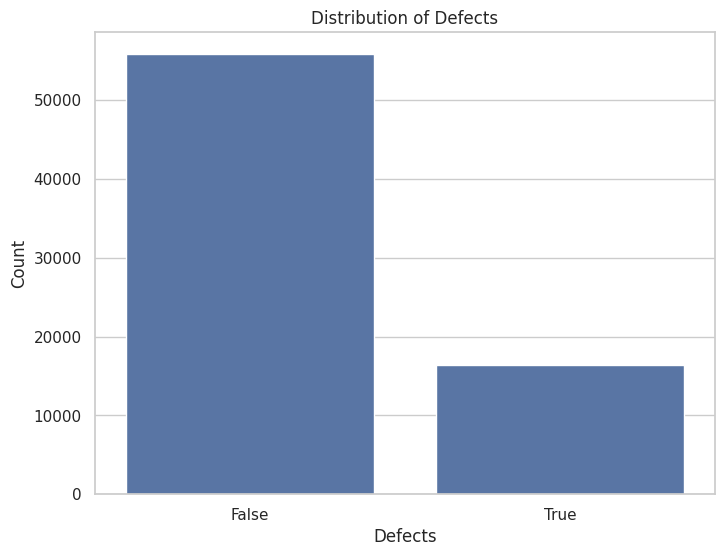

In [26]:
# Plotting the distribution of the target column
plt.figure(figsize=(8, 6))
sns.countplot(x='defects', data=df)
plt.title('Distribution of Defects')
plt.xlabel('Defects')
plt.ylabel('Count')
plt.show()

In [27]:
# finding the count of values in the defect column
df['defects'].value_counts()

,count
defects,
False,55845
True,16418


In [28]:
df['HalsteadDifficulty'].unique()

array(['5.63', '15.44', '7.31', ..., '87.03', '446.58', '65.45'],
      dtype=object)

In [29]:
df['HalsteadLineCountBlank'].unique()

array(['0', '2', '4', '3', '21', '6', '18', '10', '1', '112', 'NAN', '5',
       '35', '7', '40', '25', '15', '8', '14', '28', '92', '49', '56',
       '13', '11', '9', '42', '16', '12', '19', '224', '43', '63', '36',
       '47', '24', '30', '86', '147', '20', '98', '31', '66', '2107',
       '17', '26', '27', '77', '22', '84', '217', '70', '34', '59', '91',
       '175', '119', '41', '54', '182', '69', '126', '39', '189', '168',
       '37', '392', '196', '161', '52', '133', '32', '518', '114', '4116',
       '105', '245', '33', '343', '154', '23', '29', '329', '79', '252',
       '511', '140', '46', '301', '637', '55', '231', '83', '93', '64',
       '294', '539', '322', '135', '50', '72', '38', '980', '259', '102',
       '143', '219', '490', '67', '53', '45', '588', '686', '106', '266',
       '80', '1001', '238', '784', '1029', '441', '78', '210', '1519',
       '504', '1148', '280', '3234', '44', '798', '462', '455', '75',
       '74', '287', '164', '58', '76', '350', '735', '38

In [30]:
df['UniqueOperators'].unique()

array(['9', '13', '10', '0', '11', '15', '14', '91', '19', '22', '21',
       '16', '26', '8', '6', '12', '23', '3', '70', '182', '7', '24',
       '20', '18', '17', '77', '56', '35', 'NAN', '5', '49', '4', '25',
       '98', '31', '27', '154', '133', '84', '63', '112', '105', '29',
       '147', '32', '28', '34', '126', '44', '30', '119', '168', '42',
       '2', '140', '36', '33', '45', '1', '40', '37', '189', '161', '51',
       '46', '67', '210', '41', '196', '58', '155', '43', '224', '175',
       '203', '308', '65', '48', '336', '99', '39', '172', '301', '102',
       '52', '410', '38', '74', '73', '47', '238', '88', '78', '343',
       '217', '61', '252', '266', '231'], dtype=object)

In [31]:
df['OperatorToOperandRatio'].unique()

array(['1.5', '1.210526316', '1.692307692', ..., '121.8461538',
       '7.326923077', '70.71428571'], dtype=object)

In [32]:
df['ComplexityEfficiency'].unique()

array(['0.355239787', '0.259067358', '0.273597811', ..., '0.546719682',
       '0.183346066', '0.669721537'], dtype=object)

In [33]:
df['CodeLanguage'].unique()

array(['JAVA', 'Ruby', 'ruby', 'Python', 'C++', 'JavaScript', 'PYTHON',
       'Java', 'c++', 'javascript', 'RUBY', 'python', 'java',
       'JAVASCRIPT'], dtype=object)

In [34]:
df['CodeSizeCategory'].unique()

array(['large', 'Medium', 'Large', 'Small', 'medium', 'SMALL', 'LARGE',
       'NAN', 'small', 'MEDIUM'], dtype=object)

In [35]:
df['CodeType'].unique()

array(['Web Application', 'Library', 'Desktop Application', 'LIBRARY',
       'web application', 'desktop application', 'DESKTOP APPLICATION',
       'library', 'WEB APPLICATION', 'NAN'], dtype=object)

In [36]:
# Changing the data type to 'int'
df['defects'] = df['defects'].astype(int)

In [37]:
df['defects'].unique()

array([0, 1])

### Typecasting the data type and filling the nan values with mean

In [38]:
df['HalsteadDifficulty'] = pd.to_numeric(df['HalsteadDifficulty'], errors='coerce')

In [41]:
df['HalsteadDifficulty']= df['HalsteadDifficulty'].fillna(df['HalsteadDifficulty'].mean())

In [42]:
df['HalsteadLineCountBlank'] = pd.to_numeric(df['HalsteadLineCountBlank'],errors='coerce')

In [43]:
df['HalsteadLineCountBlank'] = df['HalsteadLineCountBlank'].fillna(df['HalsteadLineCountBlank'].mean())

In [44]:
df['HalsteadLineCountBlank'].unique()

array([0.00000000e+00, 2.00000000e+00, 4.00000000e+00, 3.00000000e+00,
       2.10000000e+01, 6.00000000e+00, 1.80000000e+01, 1.00000000e+01,
       1.00000000e+00, 1.12000000e+02, 6.91300337e+00, 5.00000000e+00,
       3.50000000e+01, 7.00000000e+00, 4.00000000e+01, 2.50000000e+01,
       1.50000000e+01, 8.00000000e+00, 1.40000000e+01, 2.80000000e+01,
       9.20000000e+01, 4.90000000e+01, 5.60000000e+01, 1.30000000e+01,
       1.10000000e+01, 9.00000000e+00, 4.20000000e+01, 1.60000000e+01,
       1.20000000e+01, 1.90000000e+01, 2.24000000e+02, 4.30000000e+01,
       6.30000000e+01, 3.60000000e+01, 4.70000000e+01, 2.40000000e+01,
       3.00000000e+01, 8.60000000e+01, 1.47000000e+02, 2.00000000e+01,
       9.80000000e+01, 3.10000000e+01, 6.60000000e+01, 2.10700000e+03,
       1.70000000e+01, 2.60000000e+01, 2.70000000e+01, 7.70000000e+01,
       2.20000000e+01, 8.40000000e+01, 2.17000000e+02, 7.00000000e+01,
       3.40000000e+01, 5.90000000e+01, 9.10000000e+01, 1.75000000e+02,
      

In [45]:
df['UniqueOperators'] = pd.to_numeric(df['UniqueOperators'],errors='coerce')

In [46]:
df['UniqueOperators'] = df['UniqueOperators'].fillna(df['UniqueOperators'].mean())

In [47]:
df['UniqueOperators'].unique()

array([  9.        ,  13.        ,  10.        ,   0.        ,
        11.        ,  15.        ,  14.        ,  91.        ,
        19.        ,  22.        ,  21.        ,  16.        ,
        26.        ,   8.        ,   6.        ,  12.        ,
        23.        ,   3.        ,  70.        , 182.        ,
         7.        ,  24.        ,  20.        ,  18.        ,
        17.        ,  77.        ,  56.        ,  35.        ,
        13.27539085,   5.        ,  49.        ,   4.        ,
        25.        ,  98.        ,  31.        ,  27.        ,
       154.        , 133.        ,  84.        ,  63.        ,
       112.        , 105.        ,  29.        , 147.        ,
        32.        ,  28.        ,  34.        , 126.        ,
        44.        ,  30.        , 119.        , 168.        ,
        42.        ,   2.        , 140.        ,  36.        ,
        33.        ,  45.        ,   1.        ,  40.        ,
        37.        , 189.        , 161.        ,  51.  

In [48]:
df['OperatorToOperandRatio'] = pd.to_numeric(df['OperatorToOperandRatio'],errors='coerce')

In [49]:
df['OperatorToOperandRatio'].unique()

array([  1.5       ,   1.21052632,   1.69230769, ..., 121.8461538 ,
         7.32692308,  70.71428571])

In [50]:
df['OperatorToOperandRatio'] = df['OperatorToOperandRatio'].fillna(df['OperatorToOperandRatio'].mean())

In [51]:
df['ComplexityEfficiency'] = pd.to_numeric(df['ComplexityEfficiency'],errors='coerce')

In [52]:
df['ComplexityEfficiency'].unique()

array([0.35523979, 0.25906736, 0.27359781, ..., 0.54671968, 0.18334607,
       0.66972154])

In [53]:
df['ComplexityEfficiency'].value_counts()

,count
ComplexityEfficiency,
inf,8795
0.333333,1481
0.285714,1397
0.400000,1323
0.500000,1177
...,...
0.319803,1
0.447141,1
0.294574,1


### Converting the string to lower case and use feature mapping

In [54]:
df['CodeLanguage'] = df['CodeLanguage'].str.lower()

In [55]:
df['CodeLanguage'].unique()

array(['java', 'ruby', 'python', 'c++', 'javascript'], dtype=object)

<ipython-input-56-97b5657e5cab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CodeLanguage', palette='viridis')  # Seaborn's countplot for better aesthetics


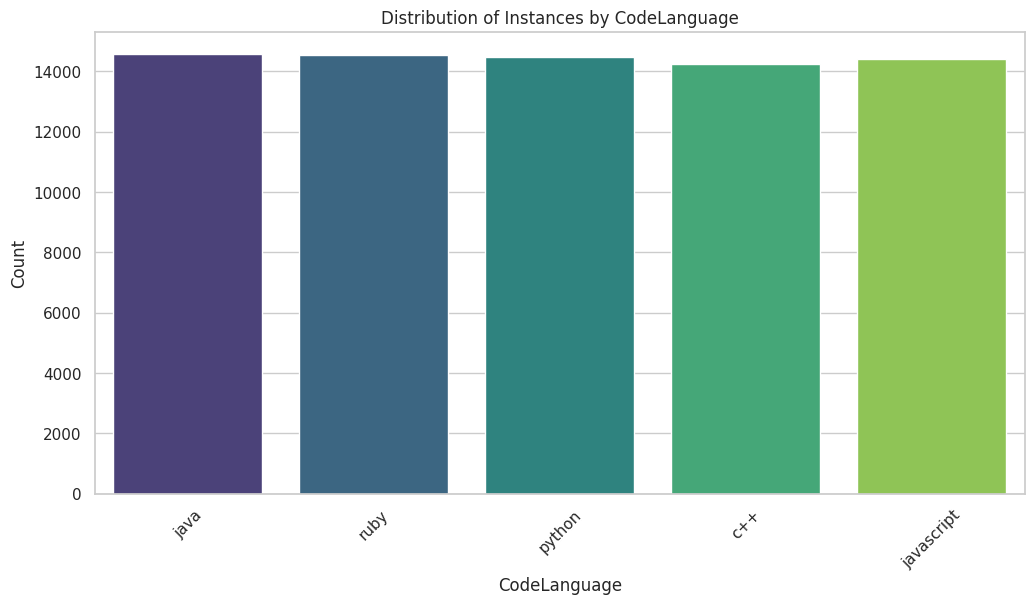

In [56]:
# Plotting the bar plot for CodeLanguage distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='CodeLanguage', palette='viridis')  # Seaborn's countplot for better aesthetics
plt.title('Distribution of Instances by CodeLanguage')
plt.xlabel('CodeLanguage')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [57]:

code_language_mapping = {
    'python': 1,
    'ruby': 2,
    'java': 3,
    'c++': 4,
    'javascript': 5,
}

df['CodeLanguage'] = df['CodeLanguage'].map(code_language_mapping)


In [58]:
df['CodeSizeCategory'] = df['CodeSizeCategory'].str.lower()

In [59]:
df['CodeSizeCategory'].unique()

array(['large', 'medium', 'small', 'nan'], dtype=object)

In [60]:
mode_value = df['CodeSizeCategory'].mode()[0]
df['CodeSizeCategory'] = df['CodeSizeCategory'].replace('nan', mode_value)

In [61]:
df['CodeSizeCategory'].unique()

array(['large', 'medium', 'small'], dtype=object)

<ipython-input-62-7d96a6e6e5cf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CodeSizeCategory', palette='pastel')  # Seaborn's countplot for better aesthetics


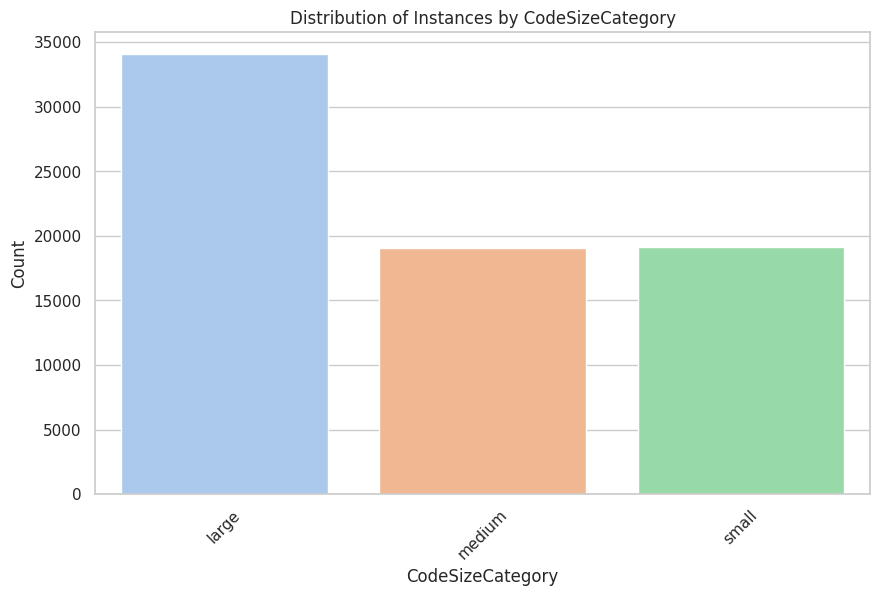

In [62]:
# Plotting the count plot for CodeSizeCategory distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CodeSizeCategory', palette='pastel')  # Seaborn's countplot for better aesthetics
plt.title('Distribution of Instances by CodeSizeCategory')
plt.xlabel('CodeSizeCategory')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [63]:
code_size_mapping = {'small': 1, 'medium': 2, 'large': 3}

df['CodeSizeCategory'] = df['CodeSizeCategory'].map(lambda x: code_size_mapping.get(x, x))

In [64]:
df['CodeSizeCategory'].unique()

array([3, 2, 1])

In [65]:
df['CodeType'] = df['CodeType'].str.lower()

In [66]:
df['CodeType'].unique()

array(['web application', 'library', 'desktop application', 'nan'],
      dtype=object)

In [69]:
mode_value = df['CodeType'].mode()[0]
df['CodeType'] = df['CodeType'].replace('nan', mode_value)

In [70]:
df['CodeType'].unique()

array(['web application', 'library', 'desktop application'], dtype=object)

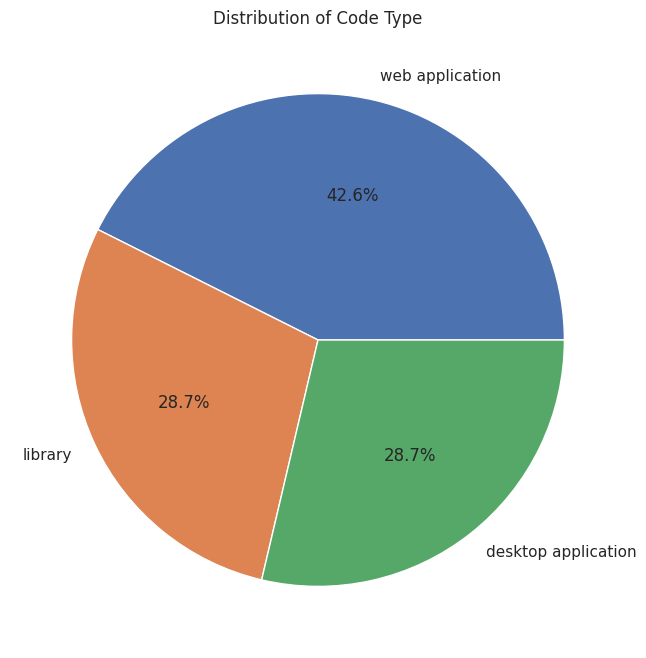

In [71]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
code_type_counts = df['CodeType'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8,8))
plt.pie(code_type_counts, labels=code_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Code Type')
plt.show()

In [72]:
code_type_mapping = {'web application': 1, 'desktop application': 2, 'library': 3}

df['CodeType'] = df['CodeType'].map(lambda x: code_type_mapping.get(x, x))

In [73]:
df['CodeType'].unique()

array([1, 3, 2])

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72263 entries, 0 to 74794
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               72263 non-null  int64  
 1   McCabeLineCount                  72263 non-null  int64  
 2   McCabeCyclomaticComplexity       72263 non-null  int64  
 3   McCabeEssentialComplexity        72263 non-null  int64  
 4   McCabeDesignComplexity           72263 non-null  float64
 5   HalsteadTotalOperatorsOperands   72263 non-null  int64  
 6   HalsteadVolume                   72263 non-null  float64
 7   HalsteadProgramLength            72263 non-null  float64
 8   HalsteadDifficulty               72263 non-null  float64
 9   HalsteadIntelligence             72263 non-null  float64
 10  HalsteadEffort                   72263 non-null  float64
 11  HalsteadB                        72263 non-null  float64
 12  HalsteadTimeEstimator  

### Checking and handling the missing value

In [75]:
code_comment_ratio_counts = df['CodeAndCommentRatio'].value_counts()
code_comment_ratio_counts

,count
CodeAndCommentRatio,
inf,51778
6.000000,443
5.000000,420
10.000000,348
4.000000,331
...,...
15.875000,1
4.366667,1
94.400000,1


In [76]:
ComplexityEfficiency_counts = df['ComplexityEfficiency'].value_counts()
ComplexityEfficiency_counts


,count
ComplexityEfficiency,
inf,8795
0.333333,1481
0.285714,1397
0.400000,1323
0.500000,1177
...,...
0.319803,1
0.447141,1
0.294574,1


In [77]:
df['ComplexityEfficiency'] = df['ComplexityEfficiency'].replace([np.inf, -np.inf], 0)

In [79]:
df['ComplexityEfficiency'].value_counts()

,count
ComplexityEfficiency,
0.000000,8795
0.333333,1481
0.285714,1397
0.400000,1323
0.500000,1177
...,...
0.319803,1
0.447141,1
0.294574,1


In [80]:
df['ComplexityEfficiency'] = df['ComplexityEfficiency'].fillna(df['ComplexityEfficiency'].mean())

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72263 entries, 0 to 74794
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               72263 non-null  int64  
 1   McCabeLineCount                  72263 non-null  int64  
 2   McCabeCyclomaticComplexity       72263 non-null  int64  
 3   McCabeEssentialComplexity        72263 non-null  int64  
 4   McCabeDesignComplexity           72263 non-null  float64
 5   HalsteadTotalOperatorsOperands   72263 non-null  int64  
 6   HalsteadVolume                   72263 non-null  float64
 7   HalsteadProgramLength            72263 non-null  float64
 8   HalsteadDifficulty               72263 non-null  float64
 9   HalsteadIntelligence             72263 non-null  float64
 10  HalsteadEffort                   72263 non-null  float64
 11  HalsteadB                        72263 non-null  float64
 12  HalsteadTimeEstimator  

In [82]:
df.isnull().sum()

,0
id,0
McCabeLineCount,0
McCabeCyclomaticComplexity,0
McCabeEssentialComplexity,0
McCabeDesignComplexity,0
HalsteadTotalOperatorsOperands,0
HalsteadVolume,0
HalsteadProgramLength,0
HalsteadDifficulty,0
HalsteadIntelligence,0


In [83]:
df['CommentDensity'].value_counts()

,count
CommentDensity,
0.000000,32189
inf,23381
1.000000,1503
0.500000,1247
0.333333,767
...,...
4.687500,1
9.411765,1
0.023256,1


In [84]:
df['OperatorToOperandRatio'].value_counts()

,count
OperatorToOperandRatio,
1.500000,18473
2.000000,1125
1.333333,1010
1.666667,976
inf,936
...,...
11.071429,1
2.139535,1
10.869565,1


In [85]:
df['OperatorToOperandRatio'] = df['OperatorToOperandRatio'].replace([np.inf, -np.inf], 0)

In [86]:
df['CodeDensity']= df['CodeDensity'].replace([np.inf, -np.inf], 0)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72263 entries, 0 to 74794
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               72263 non-null  int64  
 1   McCabeLineCount                  72263 non-null  int64  
 2   McCabeCyclomaticComplexity       72263 non-null  int64  
 3   McCabeEssentialComplexity        72263 non-null  int64  
 4   McCabeDesignComplexity           72263 non-null  float64
 5   HalsteadTotalOperatorsOperands   72263 non-null  int64  
 6   HalsteadVolume                   72263 non-null  float64
 7   HalsteadProgramLength            72263 non-null  float64
 8   HalsteadDifficulty               72263 non-null  float64
 9   HalsteadIntelligence             72263 non-null  float64
 10  HalsteadEffort                   72263 non-null  float64
 11  HalsteadB                        72263 non-null  float64
 12  HalsteadTimeEstimator  

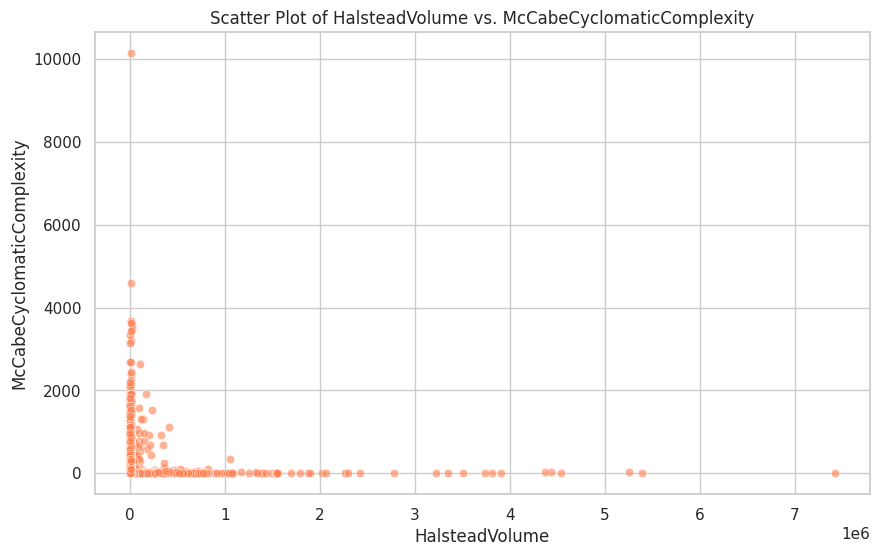

In [88]:
# Plotting the scatter plot for HalsteadVolume vs. McCabeCyclomaticComplexity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='HalsteadVolume', y='McCabeCyclomaticComplexity', color='coral', alpha=0.6)
plt.title('Scatter Plot of HalsteadVolume vs. McCabeCyclomaticComplexity')
plt.xlabel('HalsteadVolume')
plt.ylabel('McCabeCyclomaticComplexity')
plt.show()

In [ ]:
df1 = pd.read_csv('test_data.csv')
df1.head()

,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,...,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeLanguage,CodeSizeCategory,CodeType,CodeQuality,QualityScore,IsDeprecated,TeamSize
0,56120,7,1,1,1.0,14,46.51,0.38,2.67,19.93,...,3.750000,inf,118.0,JAVA,Small,Library,4,0.461219,0.0,10
1,64981,8,3,1,NaN,25,100.00,0.11,8.75,12.00,...,0.666667,inf,72.0,C++,Medium,Library,3,0.396717,1.0,5
2,42984,37,392,343,3.0,89,461.25,0.06,17.27,26.45,...,0.780000,14.0,NaN,Ruby,NaN,Web Application,1,0.430680,0.0,2
3,54865,30,4,1,NaN,77,338.58,0.04,25.38,11.04,...,0.456522,30.0,29.0,java,Small,Library,10,0.362085,0.0,6
4,79712,19,6,1,2.0,56,233.52,0.06,17.5,NaN,...,0.600000,7.0,27.0,Python,Medium,Library,7,0.199284,1.0,1


In [ ]:
# display the basic information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32056 entries, 0 to 32055
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               32056 non-null  int64  
 1   McCabeLineCount                  32056 non-null  int64  
 2   McCabeCyclomaticComplexity       32056 non-null  int64  
 3   McCabeEssentialComplexity        32056 non-null  int64  
 4   McCabeDesignComplexity           25125 non-null  float64
 5   HalsteadTotalOperatorsOperands   32056 non-null  int64  
 6   HalsteadVolume                   26140 non-null  float64
 7   HalsteadProgramLength            32056 non-null  float64
 8   HalsteadDifficulty               28835 non-null  object 
 9   HalsteadIntelligence             29743 non-null  float64
 10  HalsteadEffort                   32056 non-null  float64
 11  HalsteadB                        32056 non-null  float64
 12  HalsteadTimeEstima

In [ ]:
# dropping duplicates
df1 = df1.drop_duplicates(keep='last')
df1

,id,McCabeLineCount,McCabeCyclomaticComplexity,McCabeEssentialComplexity,McCabeDesignComplexity,HalsteadTotalOperatorsOperands,HalsteadVolume,HalsteadProgramLength,HalsteadDifficulty,HalsteadIntelligence,...,OperandsPerOperator,CodeAndCommentRatio,CodeAge,CodeLanguage,CodeSizeCategory,CodeType,CodeQuality,QualityScore,IsDeprecated,TeamSize
0,56120,7,1,1,1.0,14,46.51,0.38,2.67,19.93,...,3.750000,inf,118.0,JAVA,Small,Library,4,0.461219,0.0,10
1,64981,8,3,1,NaN,25,100.00,0.11,8.75,12.00,...,0.666667,inf,72.0,C++,Medium,Library,3,0.396717,1.0,5
2,42984,37,392,343,3.0,89,461.25,0.06,17.27,26.45,...,0.780000,14.0,NaN,Ruby,NaN,Web Application,1,0.430680,0.0,2
3,54865,30,4,1,NaN,77,338.58,0.04,25.38,11.04,...,0.456522,30.0,29.0,java,Small,Library,10,0.362085,0.0,6
4,79712,19,6,1,2.0,56,233.52,0.06,17.5,NaN,...,0.600000,7.0,27.0,Python,Medium,Library,7,0.199284,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32051,1061,68,6,1,6.0,235,1248.40,0.05,21.78,53.30,...,4.965517,47.0,696.0,python,Small,Library,2,0.136864,0.0,2
32052,30330,27,3,3,2.0,0,0.00,0.00,0,0.00,...,NaN,NaN,NaN,JavaScript,Small,NaN,10,0.007841,1.0,8
32053,100633,15,2,36,NaN,36,152.00,0.09,11,12.22,...,0.440000,inf,NaN,Python,Medium,Web Application,30,4.560739,0.0,10
32054,74862,8,1,1,NaN,2025,7493.31,0.27,3.67,26.05,...,1.083333,inf,NaN,Python,Medium,NaN,5,0.844666,1.0,5


In [ ]:
df1.shape

(31629, 36)

In [ ]:
# creating numerical columns
numerical_columns = df1.select_dtypes(include=['float64','int64','bool']).columns
numerical_columns

Index(['id', 'McCabeLineCount', 'McCabeCyclomaticComplexity',
       'McCabeEssentialComplexity', 'McCabeDesignComplexity',
       'HalsteadTotalOperatorsOperands', 'HalsteadVolume',
       'HalsteadProgramLength', 'HalsteadIntelligence', 'HalsteadEffort',
       'HalsteadB', 'HalsteadTimeEstimator', 'HalsteadLineCountCode',
       'HalsteadLineCountComment', 'HalsteadLineCountCodeAndComment',
       'UniqueOperands', 'TotalOperators', 'TotalOperands', 'BranchCount',
       'CodeDensity', 'CommentDensity', 'OperandsPerOperator',
       'CodeAndCommentRatio', 'CodeAge', 'CodeQuality', 'QualityScore',
       'IsDeprecated', 'TeamSize'],
      dtype='object')

In [ ]:
# Count the number of missing values in each column
missing_values = df1.isnull().sum()
missing_values

,0
id,0
McCabeLineCount,0
McCabeCyclomaticComplexity,0
McCabeEssentialComplexity,0
McCabeDesignComplexity,6830
HalsteadTotalOperatorsOperands,0
HalsteadVolume,5845
HalsteadProgramLength,0
HalsteadDifficulty,3177
HalsteadIntelligence,2274


In [ ]:
# Calculate the percentage of missing values
percentage_missing = (missing_values / len(df)) * 100
percentage_missing

,0
id,0.000000
McCabeLineCount,0.000000
McCabeCyclomaticComplexity,0.000000
McCabeEssentialComplexity,0.000000
McCabeDesignComplexity,9.451587
HalsteadTotalOperatorsOperands,0.000000
HalsteadVolume,8.088510
HalsteadProgramLength,0.000000
HalsteadDifficulty,4.396441
HalsteadIntelligence,3.146839


In [ ]:
#Creating categorical column
categorical_columns = df1.select_dtypes(exclude=['float64','int64','bool']).columns

In [ ]:
# List of object columns to fill missing values by mode
object_columns_to_fill = ['HalsteadDifficulty', 'HalsteadLineCountBlank', 'UniqueOperators',
                           'OperatorToOperandRatio', 'ComplexityEfficiency', 'CodeSizeCategory', 'CodeType']

df1[object_columns_to_fill] = df1[object_columns_to_fill].apply(lambda x: x.fillna(x.mode()[0]))

In [ ]:
# List of numerical columns to fill missing values
numerical_columns_to_fill = ['McCabeDesignComplexity', 'HalsteadVolume', 'HalsteadIntelligence',
                              'HalsteadTimeEstimator', 'HalsteadLineCountCode',
                              'HalsteadLineCountCodeAndComment', 'TotalOperators', 'CodeDensity',
                              'OperandsPerOperator', 'CodeAndCommentRatio', 'CodeAge', 'IsDeprecated','CommentDensity']

# Fill missing values in specified numerical columns with their mean
df1[numerical_columns_to_fill] = df1[numerical_columns_to_fill].fillna(df1[numerical_columns_to_fill].mean())

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31629 entries, 0 to 32055
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               31629 non-null  int64  
 1   McCabeLineCount                  31629 non-null  int64  
 2   McCabeCyclomaticComplexity       31629 non-null  int64  
 3   McCabeEssentialComplexity        31629 non-null  int64  
 4   McCabeDesignComplexity           31629 non-null  float64
 5   HalsteadTotalOperatorsOperands   31629 non-null  int64  
 6   HalsteadVolume                   31629 non-null  float64
 7   HalsteadProgramLength            31629 non-null  float64
 8   HalsteadDifficulty               31629 non-null  object 
 9   HalsteadIntelligence             31629 non-null  float64
 10  HalsteadEffort                   31629 non-null  float64
 11  HalsteadB                        31629 non-null  float64
 12  HalsteadTimeEstima

In [ ]:
#find the number of unique values in each column
df1.nunique()

id                                 31629
McCabeLineCount                      484
McCabeCyclomaticComplexity           126
McCabeEssentialComplexity            129
McCabeDesignComplexity                97
HalsteadTotalOperatorsOperands      1348
HalsteadVolume                      5056
HalsteadProgramLength                157
HalsteadDifficulty                  3194
HalsteadIntelligence                6954
HalsteadEffort                     10140
HalsteadB                            556
HalsteadTimeEstimator               8808
HalsteadLineCountCode                584
HalsteadLineCountComment             155
HalsteadLineCountBlank               128
HalsteadLineCountCodeAndComment       46
UniqueOperators                       85
UniqueOperands                       418
TotalOperators                      1019
TotalOperands                        958
BranchCount                          277
CodeDensity                         2155
OperatorToOperandRatio              4667
CommentDensity  

In [ ]:
df1['HalsteadDifficulty'].unique()

array(['2.67', '8.75', '17.27', ..., '264.33', '14.56', '26.95'],
      dtype=object)

In [ ]:
df1['HalsteadLineCountBlank'].unique()

array(['1', '0', '6', '4', '2', '14', '5', '3', '7', '36', '21', '16',
       '8', '22', '105', '28', '11', '49', '9', '47', '18', 'NAN', '147',
       '24', '17', '13', '42', '63', '245', '70', '12', '31', '56', '35',
       '10', '26', '39', '84', '15', '91', '25', '33', '98', '168', '140',
       '441', '27', '43', '19', '112', '1372', '23', '30', '20', '504',
       '37', '29', '273', '588', '238', '77', '133', '196', '202', '126',
       '34', '259', '72', '182', '32', '294', '931', '119', '343', '231',
       '92', '490', '55', '46', '64', '54', '89', '38', '154', '392',
       '210', '539', '106', '219', '40', '175', '686', '637', '44', '189',
       '86', '1323', '525', '301', '41', '143', '3528', '308', '203',
       '532', '75', '59', '784', '2107', '164', '329', '1029', '80',
       '224', '48', '45', '217', '65', '74', '161', '52', '73', '78',
       '280', '1078', '66', '735', '385'], dtype=object)

In [ ]:
df1['UniqueOperators'].unique()

array(['4', '10', '18', '7', '15', '13', '14', '12', '11', '6', '9', '0',
       '49', '17', '19', '8', '24', '25', '133', '16', '23', '22', '98',
       '20', '35', '84', '112', '3', '5', '126', '77', '21', '70', '29',
       '40', 'NAN', '26', '36', '56', '42', '119', '105', '182', '91',
       '140', '63', '30', '301', '27', '28', '161', '38', '217', '168',
       '154', '32', '99', '34', '33', '41', '147', '31', '43', '58', '44',
       '46', '45', '1', '189', '175', '196', '203', '102', '37', '39',
       '65', '224', '280', '231', '245', '78', '210', '52', '266', '2'],
      dtype=object)

In [ ]:
df1['OperatorToOperandRatio'].unique()

array(['1.333333333', '1.5', '1.282051282', ..., '1.68707483',
       '7.192982456', '2.044776119'], dtype=object)

In [ ]:
df1['ComplexityEfficiency'].unique()

array(['0.374531835', '0.342857143', '0.463231036', ..., '0.206550605',
       '0.160707111', '0.022624434'], dtype=object)

In [ ]:
df1['CodeLanguage'].unique()

array(['JAVA', 'C++', 'Ruby', 'java', 'Python', 'Java', 'python',
       'JavaScript', 'PYTHON', 'c++', 'JAVASCRIPT', 'RUBY', 'javascript',
       'ruby'], dtype=object)

In [ ]:
df1['CodeSizeCategory'].unique()

array(['Small', 'Medium', 'Large', 'MEDIUM', 'LARGE', 'SMALL', 'medium',
       'NAN', 'small', 'large'], dtype=object)

In [ ]:
df1['CodeType'].unique()

array(['Library', 'Web Application', 'Desktop Application',
       'WEB APPLICATION', 'desktop application', 'LIBRARY', 'NAN',
       'library', 'DESKTOP APPLICATION', 'web application'], dtype=object)

In [ ]:
df1['HalsteadDifficulty'] = pd.to_numeric(df1['HalsteadDifficulty'], errors='coerce')
df1['HalsteadDifficulty']= df1['HalsteadDifficulty'].fillna(df1['HalsteadDifficulty'].mean())
df1['HalsteadLineCountBlank'] = pd.to_numeric(df1['HalsteadLineCountBlank'],errors='coerce')
df1['HalsteadLineCountBlank'] = df1['HalsteadLineCountBlank'].fillna(df1['HalsteadLineCountBlank'].mean())

In [ ]:
df1['HalsteadLineCountBlank'].unique()

array([1.00000000e+00, 0.00000000e+00, 6.00000000e+00, 4.00000000e+00,
       2.00000000e+00, 1.40000000e+01, 5.00000000e+00, 3.00000000e+00,
       7.00000000e+00, 3.60000000e+01, 2.10000000e+01, 1.60000000e+01,
       8.00000000e+00, 2.20000000e+01, 1.05000000e+02, 2.80000000e+01,
       1.10000000e+01, 4.90000000e+01, 9.00000000e+00, 4.70000000e+01,
       1.80000000e+01, 7.18284071e+00, 1.47000000e+02, 2.40000000e+01,
       1.70000000e+01, 1.30000000e+01, 4.20000000e+01, 6.30000000e+01,
       2.45000000e+02, 7.00000000e+01, 1.20000000e+01, 3.10000000e+01,
       5.60000000e+01, 3.50000000e+01, 1.00000000e+01, 2.60000000e+01,
       3.90000000e+01, 8.40000000e+01, 1.50000000e+01, 9.10000000e+01,
       2.50000000e+01, 3.30000000e+01, 9.80000000e+01, 1.68000000e+02,
       1.40000000e+02, 4.41000000e+02, 2.70000000e+01, 4.30000000e+01,
       1.90000000e+01, 1.12000000e+02, 1.37200000e+03, 2.30000000e+01,
       3.00000000e+01, 2.00000000e+01, 5.04000000e+02, 3.70000000e+01,
      

In [ ]:
df1['UniqueOperators'] = pd.to_numeric(df1['UniqueOperators'],errors='coerce')
df1['UniqueOperators'] = df1['UniqueOperators'].fillna(df1['UniqueOperators'].mean())

In [ ]:
df['UniqueOperators'].unique()

array([  9.        ,  13.        ,  10.        ,   0.        ,
        11.        ,  15.        ,  14.        ,  91.        ,
        19.        ,  22.        ,  21.        ,  16.        ,
        26.        ,   8.        ,   6.        ,  12.        ,
        23.        ,   3.        ,  70.        , 182.        ,
         7.        ,  24.        ,  20.        ,  18.        ,
        17.        ,  77.        ,  56.        ,  35.        ,
        13.27539085,   5.        ,  49.        ,   4.        ,
        25.        ,  98.        ,  31.        ,  27.        ,
       154.        , 133.        ,  84.        ,  63.        ,
       112.        , 105.        ,  29.        , 147.        ,
        32.        ,  28.        ,  34.        , 126.        ,
        44.        ,  30.        , 119.        , 168.        ,
        42.        ,   2.        , 140.        ,  36.        ,
        33.        ,  45.        ,   1.        ,  40.        ,
        37.        , 189.        , 161.        ,  51.  

In [ ]:
df1['OperatorToOperandRatio'] = pd.to_numeric(df1['OperatorToOperandRatio'],errors='coerce')
df1['OperatorToOperandRatio'] = df1['OperatorToOperandRatio'].fillna(df1['OperatorToOperandRatio'].mean())
df1['ComplexityEfficiency'] = pd.to_numeric(df1['ComplexityEfficiency'],errors='coerce')


In [ ]:
df1['ComplexityEfficiency'].value_counts()

inf         3861
0.285714     620
0.333333     615
0.400000     608
0.500000     530
            ... 
0.531016       1
0.856531       1
0.294665       1
0.448229       1
0.022624       1
Name: ComplexityEfficiency, Length: 7226, dtype: int64

In [ ]:
df1['CodeLanguage'] = df1['CodeLanguage'].str.lower()

In [ ]:
code_language_mapping = {
    'python': 1,
    'ruby': 2,
    'java': 3,
    'c++': 4,
    'javascript': 5,
}

df1['CodeLanguage'] = df1['CodeLanguage'].map(code_language_mapping)


In [ ]:
df1['CodeSizeCategory'] = df1['CodeSizeCategory'].str.lower()
mode_value = df1['CodeSizeCategory'].mode().iloc[0]
df1['CodeSizeCategory'] = df1['CodeSizeCategory'].replace('nan', mode_value)

In [ ]:
code_size_mapping = {'small': 1, 'medium': 2, 'large': 3}

df1['CodeSizeCategory'] = df1['CodeSizeCategory'].map(lambda x: code_size_mapping.get(x, x))

In [ ]:
df1['CodeType'] = df1['CodeType'].str.lower()
mode_value = df1['CodeType'].mode().iloc[0]
df1['CodeType'] = df1['CodeType'].replace('nan', mode_value)

In [ ]:
code_type_mapping = {'web application': 1, 'desktop application': 2, 'library': 3}

df1['CodeType'] = df1['CodeType'].map(lambda x: code_type_mapping.get(x, x))

In [ ]:
code_comment_ratio_counts = df1['CodeAndCommentRatio'].value_counts()
code_comment_ratio_counts

inf           22578
6.000000        194
4.000000        181
5.000000        178
10.000000       172
              ...  
131.200000        1
4.941176          1
6.421053          1
15.944444         1
57.333333         1
Name: CodeAndCommentRatio, Length: 1742, dtype: int64

In [ ]:
ComplexityEfficiency_counts = df1['ComplexityEfficiency'].value_counts()
ComplexityEfficiency_counts

inf         3861
0.285714     620
0.333333     615
0.400000     608
0.500000     530
            ... 
0.531016       1
0.856531       1
0.294665       1
0.448229       1
0.022624       1
Name: ComplexityEfficiency, Length: 7226, dtype: int64

In [ ]:
df1['ComplexityEfficiency'] = df1['ComplexityEfficiency'].replace([np.inf, -np.inf], 0)

In [ ]:
df1['ComplexityEfficiency'].isna().sum()

245

In [ ]:
df1['ComplexityEfficiency'].value_counts()

0.000000    3861
0.285714     620
0.333333     615
0.400000     608
0.500000     530
            ... 
0.531016       1
0.856531       1
0.294665       1
0.448229       1
0.022624       1
Name: ComplexityEfficiency, Length: 7226, dtype: int64

In [ ]:
df1['ComplexityEfficiency'] = df1['ComplexityEfficiency'].fillna(df1['ComplexityEfficiency'].mean())

In [ ]:
df1.isnull().sum()

id                                 0
McCabeLineCount                    0
McCabeCyclomaticComplexity         0
McCabeEssentialComplexity          0
McCabeDesignComplexity             0
HalsteadTotalOperatorsOperands     0
HalsteadVolume                     0
HalsteadProgramLength              0
HalsteadDifficulty                 0
HalsteadIntelligence               0
HalsteadEffort                     0
HalsteadB                          0
HalsteadTimeEstimator              0
HalsteadLineCountCode              0
HalsteadLineCountComment           0
HalsteadLineCountBlank             0
HalsteadLineCountCodeAndComment    0
UniqueOperators                    0
UniqueOperands                     0
TotalOperators                     0
TotalOperands                      0
BranchCount                        0
CodeDensity                        0
OperatorToOperandRatio             0
CommentDensity                     0
ComplexityEfficiency               0
OperandsPerOperator                0
C

In [ ]:
df1['CommentDensity'].value_counts()

0.000000     13918
inf          10391
1.000000       658
0.500000       486
0.333333       320
             ...  
1.545455         1
30.000000        1
3.525424         1
0.775000         1
1.243243         1
Name: CommentDensity, Length: 786, dtype: int64

In [ ]:
df1['OperatorToOperandRatio'] = df1['OperatorToOperandRatio'].replace([np.inf, -np.inf], 0)

In [ ]:
df1['OperatorToOperandRatio'].value_counts

<bound method IndexOpsMixin.value_counts of 0         1.333333
1         1.500000
2         1.282051
3         0.000000
4         1.666667
           ...    
32051    12.888889
32052     1.500000
32053     2.272727
32054     0.923077
32055     2.058824
Name: OperatorToOperandRatio, Length: 31629, dtype: float64>

In [ ]:
df1['CodeDensity']= df1['CodeDensity'].replace([np.inf, -np.inf], 0)

In [ ]:
df1['CodeDensity'].value_counts

<bound method IndexOpsMixin.value_counts of 0        20.000000
1         0.000000
2         4.666667
3        15.000000
4        14.000000
           ...    
32051     5.222222
32052     0.000000
32053    12.000000
32054     6.000000
32055    58.500000
Name: CodeDensity, Length: 31629, dtype: float64>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train = df.drop(['defects', 'CodeAndCommentRatio', 'CommentDensity'], axis=1)
y_train = df['defects']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Random Forest

Predicted labels for the test data:
[0 0 0 ... 0 0 0]
Accuracy: 0.8073756313568118
F1-Score: 0.46523242412600846
AUC: 0.7736987661206653
RandomForest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88     11094
           1       0.66      0.36      0.47      3359

    accuracy                           0.81     14453
   macro avg       0.74      0.65      0.67     14453
weighted avg       0.79      0.81      0.79     14453



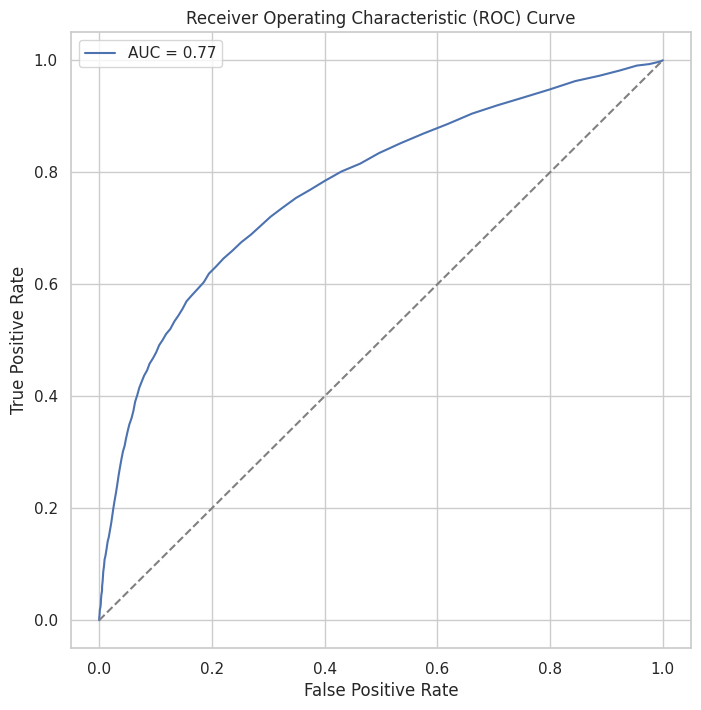

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Display the predicted labels for the test data
print("Predicted labels for the test data:")
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"F1-Score: {f1}")
print(f"AUC: {auc}")

# Display the classification report
classification_rep = classification_report(y_test, y_pred)
print("RandomForest Classification Report:\n", classification_rep)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
X_pred = df1.drop(['CodeAndCommentRatio', 'CommentDensity'], axis=1)

In [ ]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31629 entries, 0 to 32055
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               31629 non-null  int64  
 1   McCabeLineCount                  31629 non-null  int64  
 2   McCabeCyclomaticComplexity       31629 non-null  int64  
 3   McCabeEssentialComplexity        31629 non-null  int64  
 4   McCabeDesignComplexity           31629 non-null  float64
 5   HalsteadTotalOperatorsOperands   31629 non-null  int64  
 6   HalsteadVolume                   31629 non-null  float64
 7   HalsteadProgramLength            31629 non-null  float64
 8   HalsteadDifficulty               31629 non-null  float64
 9   HalsteadIntelligence             31629 non-null  float64
 10  HalsteadEffort                   31629 non-null  float64
 11  HalsteadB                        31629 non-null  float64
 12  HalsteadTimeEstima

In [ ]:
y1 = rf_model.predict(X_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
y_2 = pd.read_csv('original_data.csv')
y_2.head()

,id,defects
0,56120,0
1,64981,0
2,42984,0
3,54865,0
4,79712,0


In [ ]:
y_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31629 entries, 0 to 31628
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       31629 non-null  int64
 1   defects  31629 non-null  int64
dtypes: int64(2)
memory usage: 494.3 KB


In [ ]:
print("Unique values in y1:", set(y1))
print("Unique values in y_2:", set(y_2))

Unique values in y1: {0, 1}
Unique values in y_2: {'id', 'defects'}


In [ ]:
y_test

31865    0
65903    0
19577    1
41451    0
19935    0
        ..
61902    0
34443    0
72954    0
36552    0
27081    0
Name: defects, Length: 14453, dtype: int64

In [ ]:
# Assuming 'defects' is the column you want to use as predicted labels
y_2_predictions = y_2['defects']

# Now, check the unique values in y1 and y_2_predictions
print("Unique values in y1:", set(y1))
print("Unique values in y_2_predictions:", set(y_2_predictions))

Unique values in y1: {0, 1}
Unique values in y_2_predictions: {0, 1}


In [ ]:
acc = accuracy_score(y1,y_2_predictions)
acc

0.43909070789465365

In [ ]:
# Calculate the F1-score
f1 = f1_score(y1, y_2_predictions, average='binary')

print("F1-score:", f1)

F1-score: 0.24063690450712666


### XGBoost

Accuracy: 0.8050231785788418
F1-Score: 0.4783413550536838
AUC: 0.7709334044568558
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88     11094
           1       0.63      0.38      0.48      3359

    accuracy                           0.81     14453
   macro avg       0.73      0.66      0.68     14453
weighted avg       0.79      0.81      0.79     14453



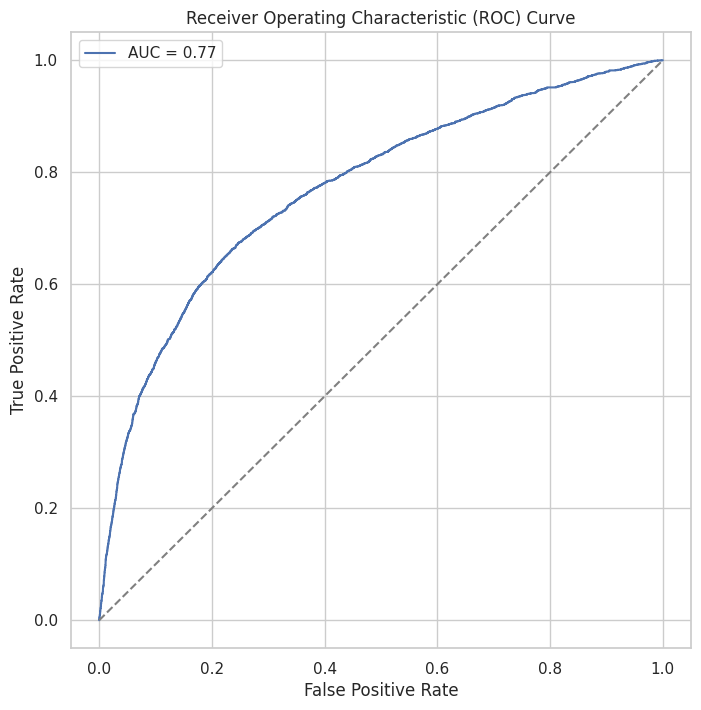

In [ ]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Example: XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xgb_model.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"F1-Score: {f1}")
print(f"AUC: {auc}")

# Display the classification report
classification_rep = classification_report(y_test, y_pred)
print("XGBoost Classification Report:\n", classification_rep)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [ ]:
y1 = xgb_model.predict(X_pred)

In [ ]:
# Assuming 'defects' is the column you want to use as predicted labels
y_2_predictions = y_2['defects']

# Now, check the unique values in y1 and y_2_predictions
print("Unique values in y1:", set(y1))
print("Unique values in y_2_predictions:", set(y_2_predictions))

Unique values in y1: {0, 1}
Unique values in y_2_predictions: {0, 1}


In [ ]:
acc = accuracy_score(y1,y_2_predictions)
print("Accuracy:",acc)

Accuracy: 0.32650415757690726


In [ ]:
# Calculate the F1-score
f1 = f1_score(y1, y_2_predictions, average='binary')

print("F1-score:", f1)

F1-score: 0.382765414928141
